<a href="https://colab.research.google.com/github/kanishkkg/ampba24s_group06_term3/blob/main/ml_ul2/t_SNE_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Import relevant libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_swiss_roll, fetch_openml, fetch_20newsgroups
from sklearn.manifold import Isomap, TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [43]:
# Generate Swiss roll dataset
X, color = make_swiss_roll(n_samples=15000)

# Create a Plotly figure
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=color,
        colorscale='spectral',
        opacity=0.8
    )
)])

# Update layout for a better visualization
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title="Interactive Swiss Roll Visualization")
fig.show(renderer="colab")

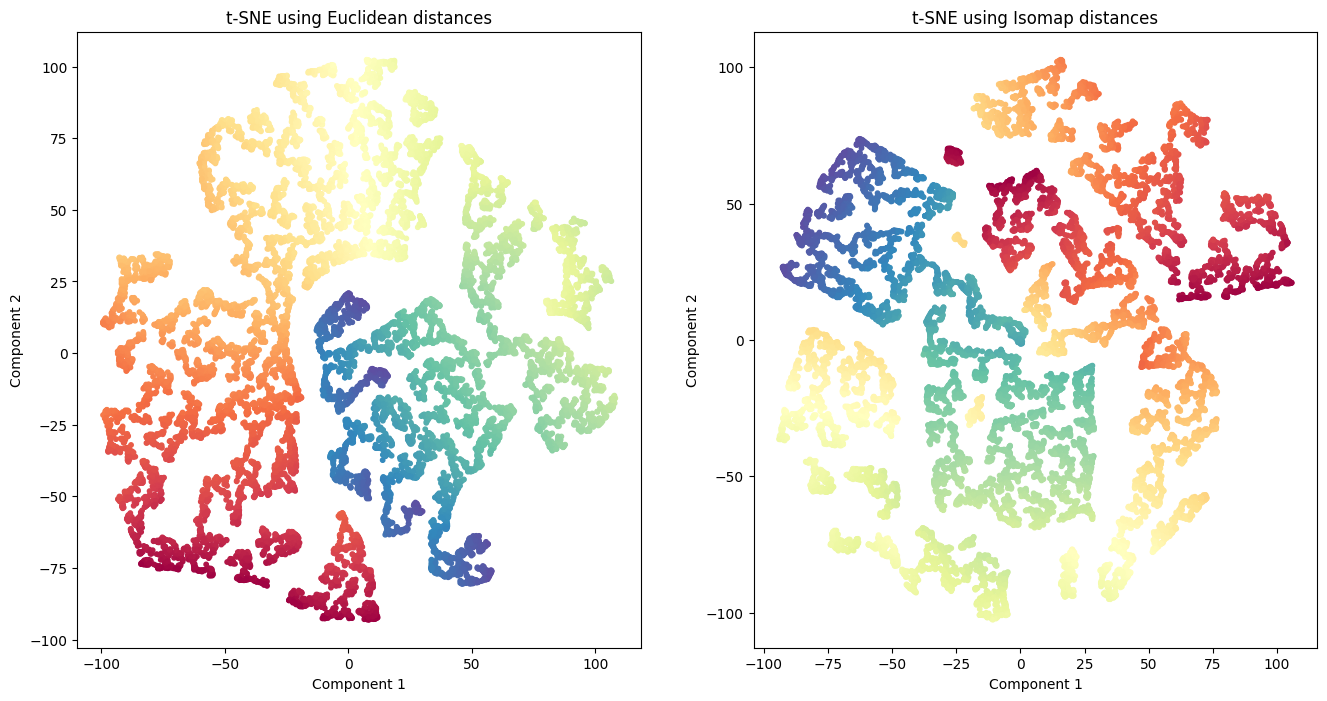

In [44]:
# Apply t-SNE to reduce the Swiss roll to 2 dimensions
tsne = TSNE(n_components=2, init='random')
X_tsne = tsne.fit_transform(X)

# Apply Isomap
isomap = Isomap(n_neighbors=10)
isomap.fit(X)
# Access the geodesic distance matrix
dist_matrix = isomap.dist_matrix_

# Apply t-SNE with the 'precomputed' metric using the Isomap distance matrix
tsne_iso = TSNE(n_components=2, metric='precomputed', init='random')
X_tsne_iso = tsne_iso.fit_transform(dist_matrix)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# t-SNE visualization using Euclidean default
ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral, s=10)
ax[0].set_title('t-SNE using Euclidean distances')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')

# t-SNE visualization
ax[1].scatter(X_tsne_iso[:, 0], X_tsne_iso[:, 1], c=color, cmap=plt.cm.Spectral, s=10)
ax[1].set_title('t-SNE using Isomap distances')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



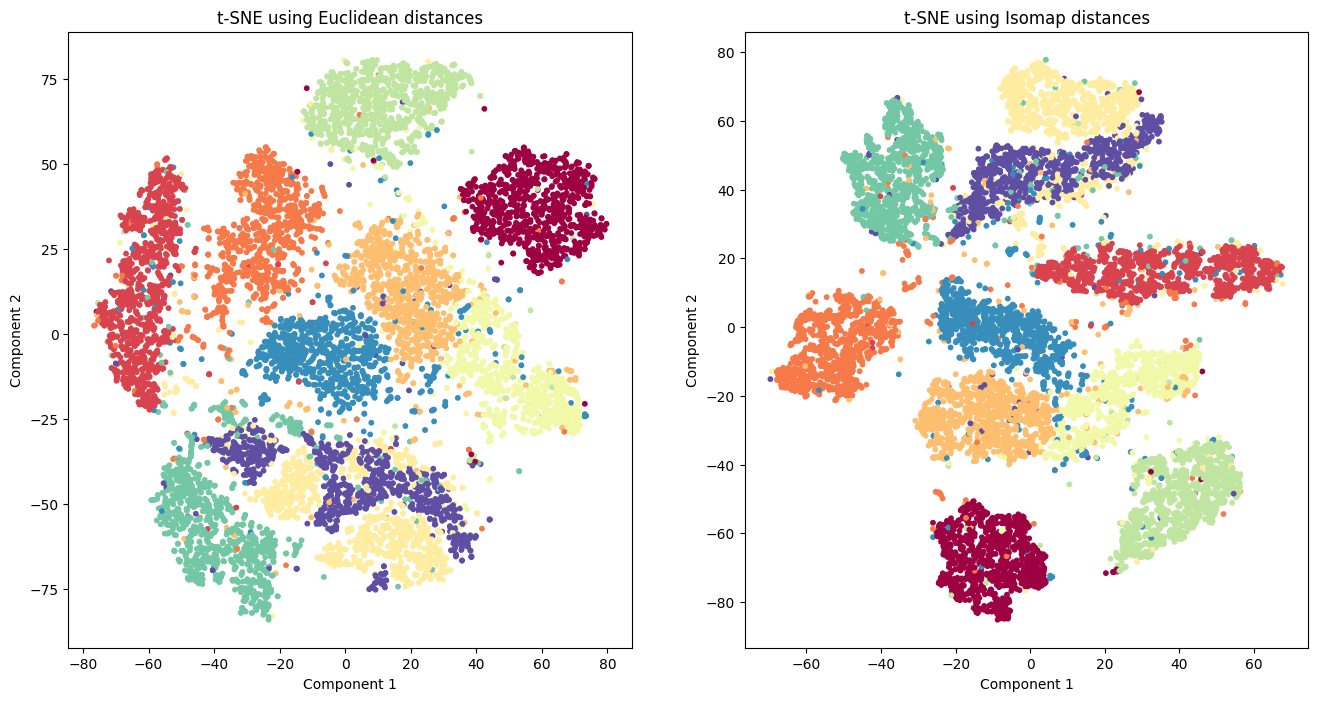

In [10]:
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:1000]  # Using a subset for quicker execution
y = mnist.target[:1000].astype(int)

# Apply Isomap
isomap = Isomap(n_neighbors=10)
isomap.fit(X)
dist_matrix = isomap.dist_matrix_

# Apply t-SNE with 'precomputed' metric
tsne_iso = TSNE(n_components=2, metric='precomputed', init='random')
X_tsne_iso = tsne_iso.fit_transform(dist_matrix)

# Apply t-SNE with default euclidean metric
tsne = TSNE(n_components=2, init='random')
X_tsne = tsne.fit_transform(X)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# t-SNE visualization using Euclidean default
ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Spectral, s=10)
ax[0].set_title('t-SNE using Euclidean distances')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')

# t-SNE visualization
ax[1].scatter(X_tsne_iso[:, 0], X_tsne_iso[:, 1], c=y, cmap=plt.cm.Spectral, s=10)
ax[1].set_title('t-SNE using Isomap distances')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')

plt.show()


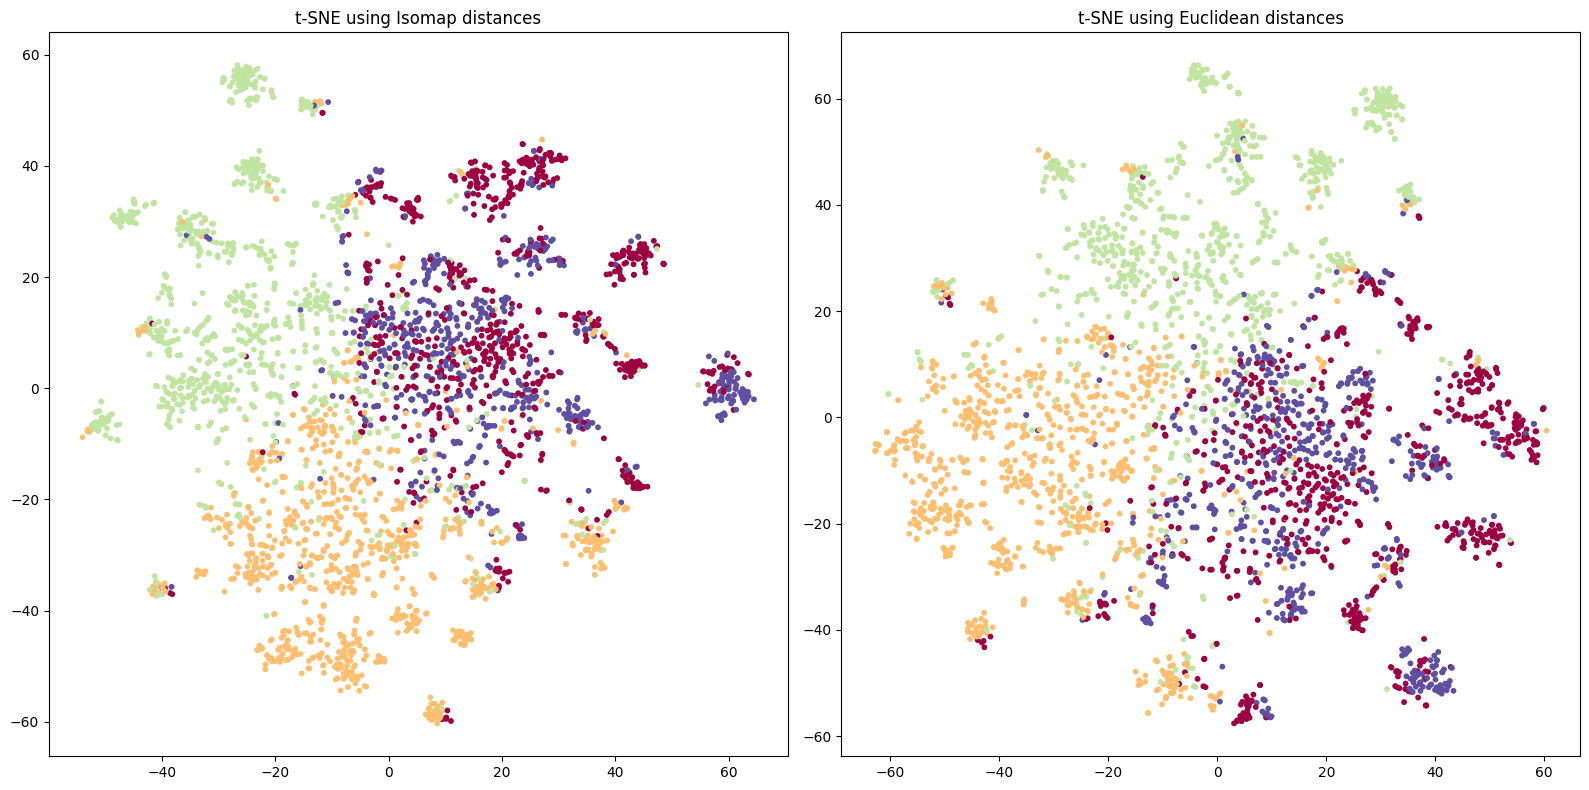

In [75]:
# Load the 20 Newsgroups dataset (subset for faster processing)
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Convert the text documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(newsgroups.data)

# Since Isomap is computationally expensive for very high-dimensional data,
# we first reduce dimensionality using TruncatedSVD before applying Isomap
svd = TruncatedSVD(n_components=50)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_reduced = lsa.fit_transform(X_tfidf)

# Apply t-SNE directly to the reduced data
tsne_iso = TSNE(n_components=2, metric='cosine', init='random')
X_tsne_iso = tsne_iso.fit_transform(X_reduced)

# Apply t-SNE with default euclidean metric
tsne = TSNE(n_components=2, init='random')
X_tsne = tsne.fit_transform(X_reduced)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot for Cosine
axes[0].scatter(X_tsne_iso[:, 0], X_tsne_iso[:, 1], c=newsgroups.target, cmap=plt.cm.Spectral, s=10)
axes[0].set_title('t-SNE using Cosine distances')

# Scatter plot for t-SNE
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=newsgroups.target, cmap=plt.cm.Spectral, s=10)
axes[1].set_title('t-SNE using Euclidean distances')

plt.tight_layout()
plt.show()

In [58]:
time_series_df = pd.read_csv("https://raw.githubusercontent.com/kanishkkg/ampba24s_group06_term3/main/ml_ul2/ua_data.csv")
time_series_df = time_series_df.drop(time_series_df.columns[0], axis = 1)

time_series_df['TotalDelay'] = time_series_df['CarrierDelay'] + time_series_df['WeatherDelay'] + time_series_df['NASDelay'] + time_series_df['SecurityDelay'] + time_series_df['LateAircraftDelay']
time_series_df = time_series_df[time_series_df['TotalDelay'] < 100]

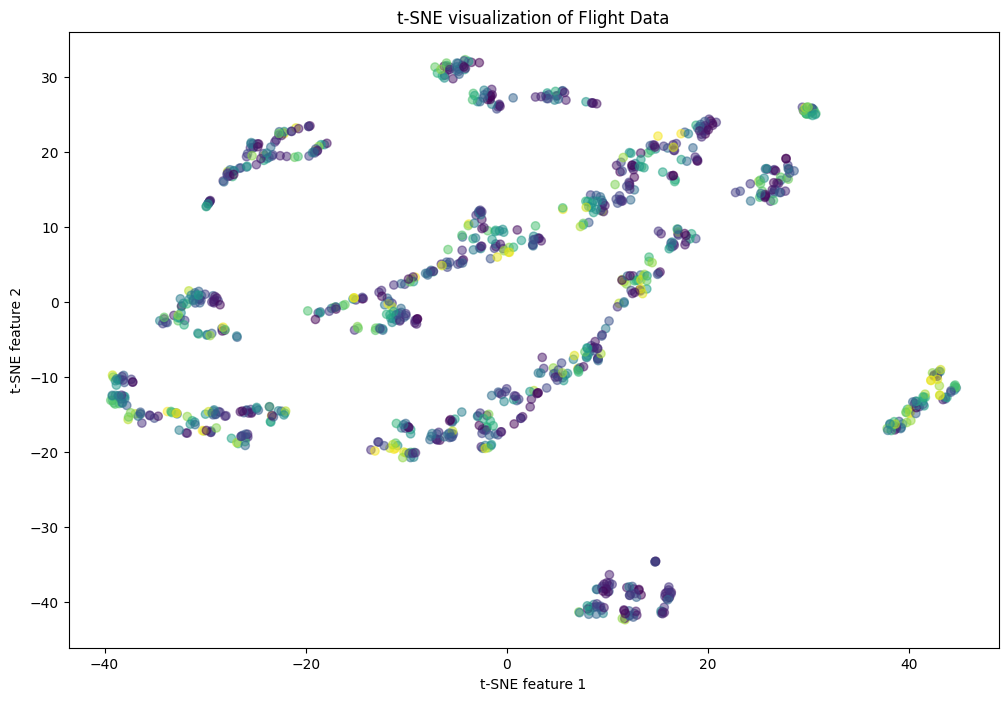

In [59]:
# Selecting a subset of numerical features for t-SNE visualization
# We'll include departure time, arrival time, day of week, and various delays as features
features = ['DepTime', 'ArrTime', 'DayOfWeek', 'DayofMonth', 'Year', 'Month', 'AirTime', 'TaxiIn', 'TaxiOut']
# Drop rows with any NaN values in these columns for simplicity
time_series_df = time_series_df[:1000].dropna()

tsne_data = time_series_df[features]
# delay_extent = MinMaxScaler().fit_transform(time_series_df['TotalDelay'].values.reshape(-1,1))

# t-SNE transformation
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tsne_data)

# Plotting the results
plt.figure(figsize=(12,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=time_series_df['TotalDelay'], alpha=0.5)
plt.title('t-SNE visualization of Flight Data using Euclidean')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

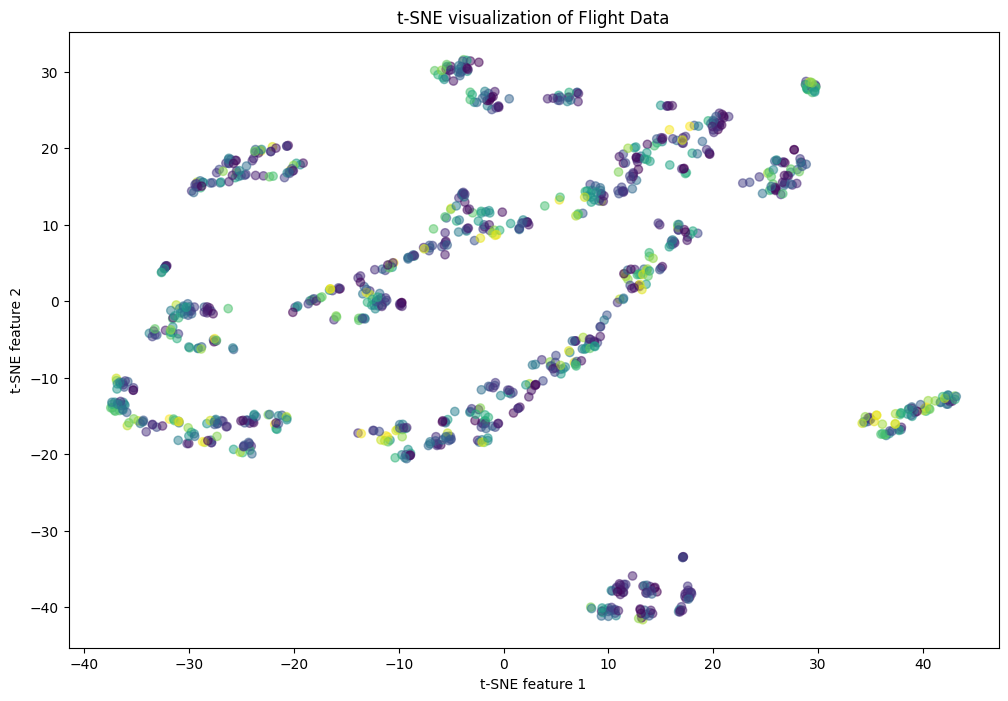

In [76]:
# t-SNE transformation
tsne = TSNE(n_components=2, random_state=42, metric='chebyshev')
tsne_results = tsne.fit_transform(tsne_data)

# Plotting the results
plt.figure(figsize=(12,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=time_series_df['TotalDelay'], alpha=0.5)
plt.title('t-SNE visualization of Flight Data using chebyshev')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()